## <center>🚦  Interstate Traffic Dataset (US)</center>
<center>Hourly data on the traffic volume for a major interstate highway in the US</center>

### 📊 About the Dataset

#### 📝 Description
> This dataset contains **hourly traffic volume data** for westbound I-94, a major interstate highway connecting Minneapolis and St. Paul, Minnesota.  
> Data was collected by the **Minnesota Department of Transportation (MnDOT)** from 2012 to 2018 at a station roughly midway between the two cities.

#### 🔑 Key Features

| Feature | Type | Description |
|---------|------|-------------|
| 🎉 **holiday** | Categorical | Indicates if the date is a **US national or regional holiday** (e.g., Minnesota State Fair). |
| 🌡️ **temp** | Numeric | Average temperature in **Kelvin**. |
| ☔ **rain_1h** | Numeric | Rainfall in **mm** during the hour. |
| ❄️ **snow_1h** | Numeric | Snowfall in **mm** during the hour. |
| ☁️ **clouds_all** | Numeric | Percentage of **cloud cover**. |
| 🌤️ **weather_main** | Categorical | Short description of weather (e.g., Clear, Clouds, Rain). |
| 🌦️ **weather_description** | Categorical | Detailed description of weather (e.g., light rain, overcast clouds). |
| 🕒 **date_time** | Datetime | Hour of data collection in **CST**. |
| 🚗 **traffic_volume** | Numeric | Hourly reported westbound traffic volume on I-94. |

#### 🎯 Potential Use Cases

- 🔮 **Predict traffic volume** using regression models based on weather, time, and holiday features.  
- 📈 **Explore trends** in traffic patterns over time and under different conditions.  

#### 🌐 Dataset Access

- 📥 **Kaggle**: [Download dataset](https://www.kaggle.com/datasets/anshtanwar/metro-interstate-traffic-volume/data)  
- 📚 **UCI Repository**: [Dataset info](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)  
- 👤 **Creator Info**: [John Hogue LinkedIn](https://www.linkedin.com/in/johnhogue/)  

> ⚠️ The dataset contains **hour-by-hour vehicle counts** and hourly weather/holiday info, allowing analysis of how external factors affect traffic flow.


# 🎯 Objective

Predict the **number of vehicles per hour** by analyzing how various factors influence traffic.  

#### 🔑 Factors Considered

- 🕒 **Hour of the day** – captures daily traffic patterns  
- 🌡️ **Temperature** – to understand weather impact on traffic  
- ☔ **Rain** – effect of rainfall on vehicle volume  
- ❄️ **Snow** – effect of snowfall on vehicle volume  
- ☁️ **Cloudiness** – impact of cloud cover on traffic patterns  
- 🎉 **Holiday** – whether the day is a US national or regional holiday  

> 💡 The goal is to use these factors to build a predictive model that estimates **hourly traffic volume** reliably.


### <center>💾 Data Loading, Initial Data Exploration & Preparation</center>

#### 🧩 Overview
> The dataset has already been **cleaned, missing values handled, and new features created**.  
> In this step, the focus is on **loading the dataset, verifying its structure, and preparing it for EDA** to analyze relationships between variables for predicting **hourly traffic volume**.

#### 📌 Key Steps

1. **Data Loading** 🗂️  
   - Load dataset into a Pandas DataFrame  
   - Display **first few rows** to verify successful import  

2. **Initial Data Exploration** 🔍  
   - Check **data types** for each column  
   - Examine **number of rows and columns**  
   - Inspect **summary statistics** for numeric features  
   - Review **categorical feature values**  

3. **Data Cleaning & Preprocessing** 🧹  
   - **Handled missing values** ✅  
   - Converted **date/time columns** to datetime objects ⏰  
   - Created **new features** (e.g., hour, day of week, weekend/holiday flags) 🌟  
   - Verified **consistency of numeric and categorical data** ✔️  

4. **Data Preparedness** ⚡  
   - Dataset is now ready for **visual EDA**  
   - All necessary **variables for predictive modeling** are created  
   - Focus can now shift purely to **analyzing patterns and relationships**  

#### 🌟 Goal
> Ensure that the dataset is **fully prepared**, clean, and structured correctly, so that the subsequent **EDA step can focus on visual insights** to inform **hourly traffic volume prediction**.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Link to the dataset on my github
url = 'https://raw.githubusercontent.com/Guilhermertp/machine-learning-zoomcamp2025/refs/heads/main/CapstoneProj/Metro_Interstate_Traffic_Volume.csv'

In [3]:

df = pd.read_csv(url)

# Preview the dataset
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [4]:
# Check structure of the dataset (n rows and n columns)
df.shape

(48204, 9)

In [5]:
# Check columns types
df.dtypes

traffic_volume           int64
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
dtype: object

In [6]:
# Observe the stats info for the numerical features
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


In [7]:
# check for missing values
df.isnull().sum()

traffic_volume             0
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
dtype: int64

In [8]:
# Convert to datetime with dayfirst=True
df['date_time'] = pd.to_datetime(df['date_time'], dayfirst=True)

In [9]:
# Extract only the hour into a new column, as the year, month, and day are unnecessary since the analysis does not focus on seasonal or long-term trends.
df['hour'] = df['date_time'].dt.hour

df['weekday'] = df['date_time'].dt.day_name()  # Monday, Tuesday, etc.

#### Columns I can drop or don't need to create:

1. <b>Original date_time</b> – I’ve extracted hour, which is sufficient for this analysis.

2. <b>Year, month, day</b> – Not needed since I'm not analyzing seasonal trends or long-term trends.

3. <b>weather_main</b> – Summary of weather, redundant if I'm using temperature, rain, snow, clouds.

4. <b>weather_description</b> – Detailed weather, also redundant for my chosen features.

In [10]:
# Retrieve all the columns to drop after the ones I don't need
df.columns

Index(['traffic_volume', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time', 'hour', 'weekday'],
      dtype='object')

In [11]:
# There are some columns that are redundant or won't be necessary for the analysis
col_keep = ['traffic_volume', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all','hour','weekday']

df = df[col_keep]

In [12]:
df['holiday'].isnull().sum()

np.int64(48143)

In [13]:
# Binary encoding of column holiday
df['is_holiday'] = df['holiday'].notna().astype(int)

# Drop original column holiday since is not needed
df.drop(columns=['holiday'], inplace=True)

In [14]:
# Recheck columns types
df.dtypes

traffic_volume      int64
temp              float64
rain_1h           float64
snow_1h           float64
clouds_all          int64
hour                int32
weekday            object
is_holiday          int64
dtype: object

In [15]:
# Recheck null values
df.isnull().sum()

traffic_volume    0
temp              0
rain_1h           0
snow_1h           0
clouds_all        0
hour              0
weekday           0
is_holiday        0
dtype: int64

In [16]:
df_final = df.copy()

In [17]:
# One-hot encoding for the categorical features
df_final = pd.get_dummies(df, columns=['weekday'], drop_first=True)

---
### <center>🔍 EDA (Exploratory Data Analysis)</center>

#### 🧩 Overview

> Since the dataset has already been **cleaned, missing values handled, and new features created** (e.g., `hour`, `is_holiday`), the focus of this EDA is on **visual exploration** to understand patterns and relationships between variables for predicting **hourly traffic volume**.

#### 📌 EDA Objectives

* Examine the **distribution of the target (`traffic_volume`)** 📊 to identify skewness, outliers, and typical traffic ranges
* Analyze how **traffic volume varies by hour of the day** 🕒
* Examine the **impact of weather conditions** 🌡️☔❄️☁️ on traffic
* Explore **holiday effects** 🎉 on traffic patterns
* Identify **relationships between features and the target** 🔗 to assess potential predictors

#### 📊 Planned Visualizations

| Type                                              | Purpose                                                                               |
| ------------------------------------------------- | ------------------------------------------------------------------------------------- |
| 📈 **Histogram / Density Plot of Traffic Volume** | Understand **distribution**, detect skewness or outliers                              |
| 🕒 **Time Series Plot**                           | Observe **traffic trends over time** (hourly, daily, monthly)                         |
| 📈 **Histograms & Density Plots**                 | Understand **distributions** of numeric features like temperature, rain, snow, clouds |
| 📦 **Boxplots**                                   | Detect **outliers** in traffic volume and weather features                            |
| 🌡️ **Heatmaps / Correlation Matrix**             | Reveal **relationships between variables**, including encoded holiday and hour        |
| 🎨 **Scatter Plots / Pair Plots**                 | Examine **interactions between traffic volume and weather factors**                   |
| 🎉 **Bar Plots**                                  | Compare **traffic patterns on holidays vs. non-holidays**                             |
| ⏰ **Hourly/Weekly Trend Plots**                   | Identify **peak traffic hours and patterns by day of week**                           |

#### 🌟 Goal

> The EDA will help us **visually understand traffic patterns**, **inspect the target distribution**, and **confirm feature relevance**, providing a strong foundation for **predictive modeling** of hourly traffic volume.

---

#### 📈 Histogram / Density Plot of Traffic Volume	Understand distribution, detect skewness or outliers

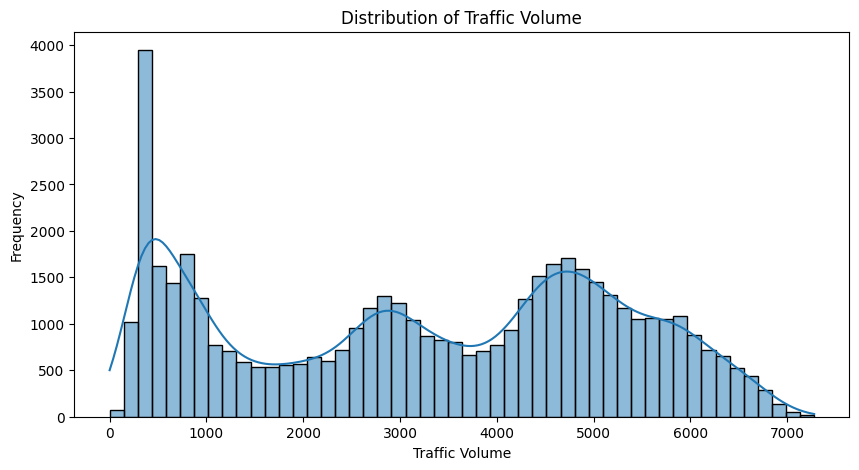

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df['traffic_volume'], bins=50, kde=True)
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

# Traffic Volume Analysis

Looking at the histogram of traffic volume:

- **Distribution:** Heavily right-skewed (long tail toward higher traffic values).  
- **Peaks:** Multiple peaks suggest a multi-modal distribution.  

## Modeling Recommendations

### Linear Regression
- We can consider a **log** or **Box-Cox** transformation of the target.  
- **Note:** If we transform for linear regression, remember to **inverse-transform predictions** to interpret results in the original scale.

### Tree-based Models
- Transformation is **optional**; they handle skewness naturally.

#### 🕒 Time Series Plot	Observe traffic trends over time (hourly, daily, monthly)

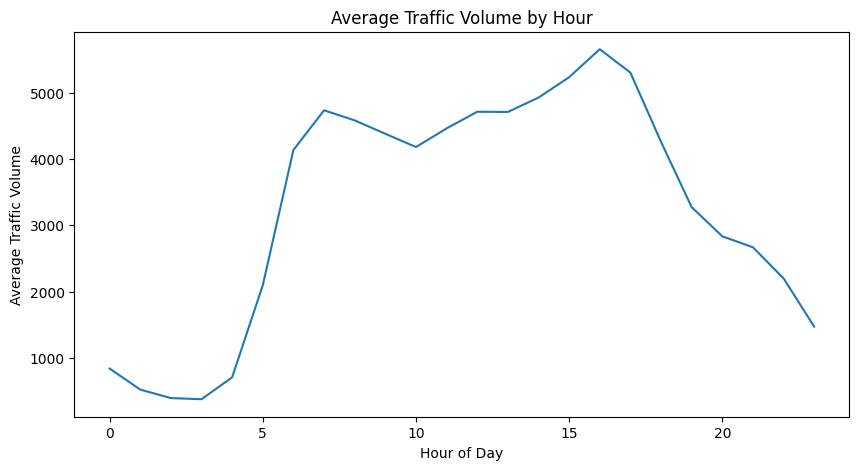

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby('hour')['traffic_volume'].mean())
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.show()

### Hourly Trends
The graph shows clear intra-day fluctuations, with traffic volume responding to typical daily routines:
- **Low activity overnight/early morning (0-5 hours)**: Volumes start at around 500-1000 at midnight, dip to a minimum of ~200-500 around 3-4 AM, and remain low until ~5 AM. This reflects reduced travel during sleep hours.
- **Morning ramp-up (5-10 hours)**: A steep increase begins around 5-6 AM, climbing rapidly to ~4000 by 8-9 AM. This aligns with morning commutes, school starts, or work shifts.
- **Midday plateau and peak (10-15 hours)**: Volumes stabilize at ~4000-4500 from 10 AM to noon, with minor fluctuations, then rise to a peak of ~4800-5000 around 3 PM (15 hours). This could indicate lunchtime activity, mid-afternoon errands, or early evening commutes.
- **Evening decline (15-24 hours)**: Post-peak, there's a steady drop to ~3000 by 6 PM (18 hours), ~2000 by 8 PM (20 hours), and back to ~500-1000 by midnight. This suggests winding down of daily activities.

Overall, the pattern is unimodal with one prominent afternoon peak, rather than bimodal (dual morning/evening peaks) seen in heavy commuter areas. Hourly changes are most pronounced during transitions (e.g., +3000 volume increase from 5-10 AM).

#### 📈 Histograms & Density Plots	Understand distributions of numeric features like temperature, rain, snow, clouds

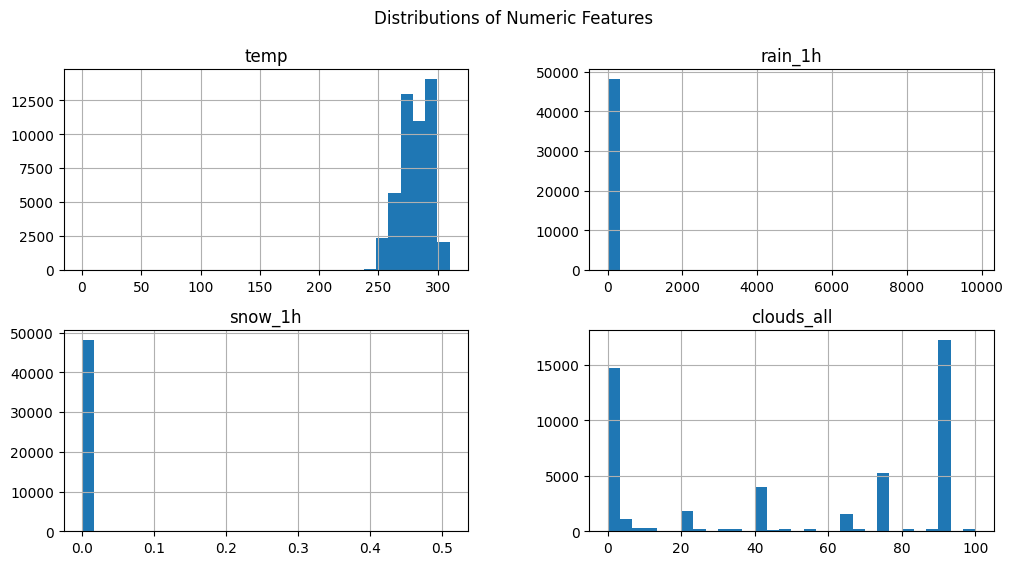

In [20]:
numeric_features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
df[numeric_features].hist(bins=30, figsize=(12,6), layout=(2,2))
plt.suptitle('Distributions of Numeric Features')
plt.show()

## 📊 Analysis of Numeric Feature Distributions

Based on the histograms displaying the distributions of numeric features (`temp`, `rain_1h`, `snow_1h`, and `clouds_all`), here is an analysis of each feature:

### 🌡️ Temperature (`temp`)

* **Distribution Type:** The distribution is **left-skewed** (or negatively skewed).
* **Key Characteristics:**
    * The vast majority of temperature values are clustered at the **higher end** of the observed range (likely near 250 to 300 units Kelvin).
    * There is a clear peak in the highest bins.
    * This suggests that the majority of the observations occurred during **warmer conditions**.

### 💧 Rain in the Last Hour (`rain_1h`)

* **Distribution Type:** The distribution is **extremely right-skewed** and **highly concentrated at zero**.
* **Key Characteristics:**
    * The overwhelming majority of observations (almost 50,000) have **no rain** recorded (a value of 0).
    * Only a tiny fraction of observations show any recorded rain, with the frequency dropping off sharply after the first bin.
    * This indicates that *rain is a rare event* in the dataset, or that the unit of measurement makes most observations appear as zero.

### ❄️ Snow in the Last Hour (`snow_1h`)

* **Distribution Type:** Similar to rain, the distribution is **extremely right-skewed** and **highly concentrated at zero**.
* **Key Characteristics:**
    * Nearly all observations (almost 50,000) have **no snow** recorded (a value of 0).
    * There is a minuscule presence of non-zero snow values, visible in the bins near 0.0 to 0.5.
    * This indicates that *snow is an even rarer event* or an insignificant quantity in the dataset compared to the other features, and is essentially a **sparse feature**.

### ☁️ Cloud Cover (`clouds_all`)

* **Distribution Type:** The distribution is **multimodal** (having multiple peaks) and is **not normally distributed**.
* **Key Characteristics:**
    * There are significant peaks at the **low end** (near 0% cloud cover - clear sky), indicating a high frequency of clear or nearly clear conditions.
    * There is another substantial peak at the **high end** (near 90-100% cloud cover - overcast), indicating a high frequency of completely overcast conditions.
    * Additional, smaller peaks appear around 20%, 40%, and 70%.
    * This suggests that the weather is often either **very clear** or **completely overcast**, with fewer days exhibiting moderate, scattered cloud cover.

---

### **Summary and Implications for Modeling**

* **Preprocessing Needs:**
    * The features `rain_1h` and `snow_1h` are highly imbalanced and sparse. For some machine learning models, you might consider **log transformations** (after adding a small constant), **binarization** (rain/snow vs. no rain/snow), or **feature engineering** to handle the heavy concentration at zero.
    * The `temp` feature might benefit from **standardization or normalization**, though its skewness is less severe than the precipitation features.
* **Insights:**
    * The dataset contains significantly more non-precipitation events than precipitation events.
    * Cloud cover is primarily bimodal (clear or overcast), suggesting two primary states for sky conditions.

#### 📦 **Boxplots**                                   | Detect **outliers** in traffic volume and weather features  

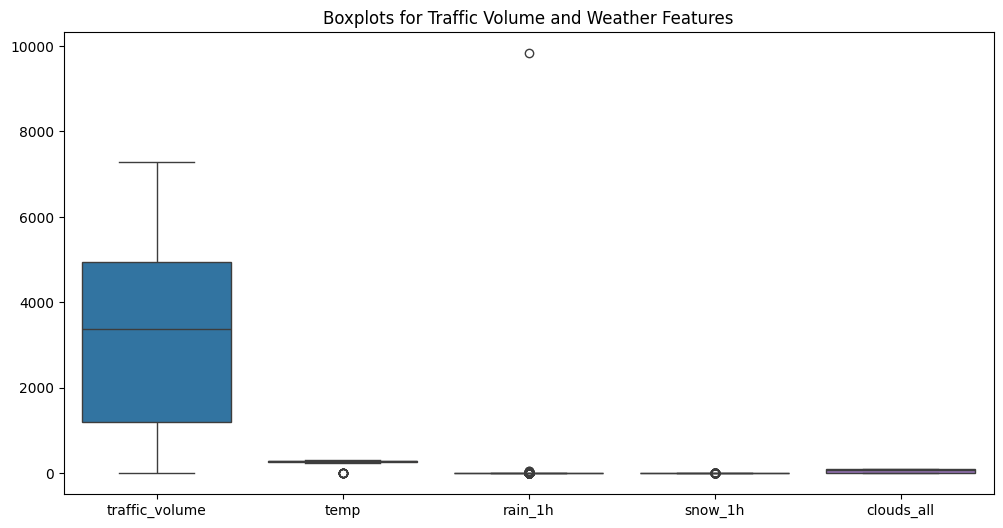

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['traffic_volume'] + numeric_features])
plt.title('Boxplots for Traffic Volume and Weather Features')
plt.show()

Looking at the boxplot, here’s an analysis regarding **outliers** for each feature:

1. **Traffic Volume (`traffic_volume`)**

   * There is **one clear outlier** well above the upper whisker (~10,000).
   * Most of the data is concentrated below 7,500.
   * This indicates occasional extremely high traffic volumes, which may need attention depending on modeling goals.

2. **Temperature (`temp`)**

   * There’s a **small number of outliers** below the lower whisker (around 0–50).
   * Overall, temperature values are tightly clustered, suggesting a relatively stable range.

3. **Rain in the last hour (`rain_1h`)**

   * There are some **outliers on the higher end** above the whisker.
   * Most rain measurements are very low, often close to 0, which is common in many traffic/weather datasets.

4. **Snow in the last hour (`snow_1h`)**

   * Similar to rain, there are **few outliers** above the upper whisker.
   * The majority of values are near 0, indicating that snowfall events are rare.

5. **Cloud coverage (`clouds_all`)**

   * There seems to be a **tight distribution** with very few or no strong outliers.
   * Most values are within a relatively small range.

**Summary:**

* `traffic_volume` has the most prominent outlier.
* `rain_1h` and `snow_1h` have occasional high outliers.
* `temp` and `clouds_all` are more tightly distributed with minimal outlier issues.
_______________________________________

#### 🌡️ Heatmaps / Correlation Matrix	Reveal relationships between variables

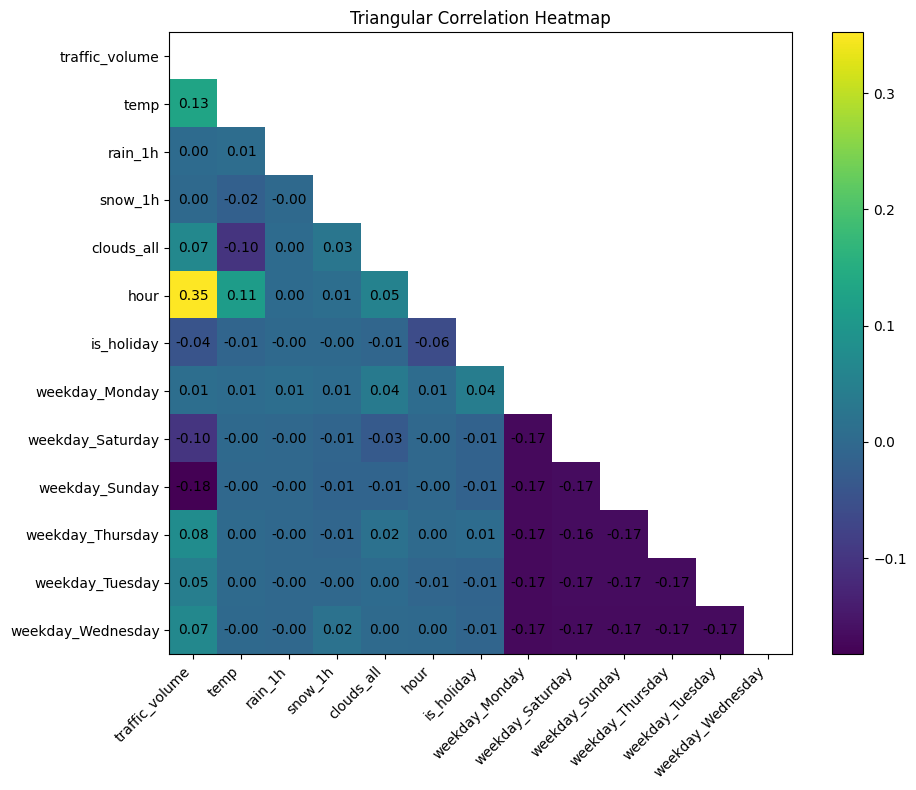

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df_final.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Apply mask
masked_corr = corr.mask(mask)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(masked_corr)

# Ticks and labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.columns)

# Add colorbar
plt.colorbar(im, ax=ax)

# Show values in cells
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if not mask[i, j]:
            ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                    ha="center", va="center")

plt.title("Triangular Correlation Heatmap")
plt.tight_layout()
plt.show()

#### Purpose of the plot:

* This heatmap displays **Pearson correlation coefficients** between the target variable (`traffic_volume`) and the input features.
* Only the **lower triangle** is shown to avoid duplicated information.
* Correlation values range from **-1 (strong negative)** to **+1 (strong positive)**.

---

#### Key observations from the heatmap:

* **traffic_volume has the highest correlation with hour (0.35)**.
  This indicates that traffic volume strongly depends on the time of day, reflecting daily traffic patterns such as rush hours.

* **traffic_volume shows a weak positive correlation with temperature (0.13)**.
  Warmer temperatures are associated with slightly higher traffic volume.

* **traffic_volume has very weak or near-zero correlations with weather variables** such as `rain_1h`, `snow_1h`, and `clouds_all`.
  This suggests that weather conditions have little direct linear impact on traffic volume in this dataset.

* **traffic_volume shows negative correlations with weekend indicators**, especially `weekday_Sunday (-0.18)` and `weekday_Saturday (-0.10)`.
  This reflects lower traffic volumes on weekends compared to weekdays.

* **Weekday dummy variables are negatively correlated with each other (~ -0.17)**.
  This is expected since only one weekday can be true at a time and does not indicate a real-world relationship.

---

#### General insight:

* **Time-based features (hour and day of week) are the most informative predictors of traffic volume**.
* **Weather variables contribute little linear predictive power** on their own.
* Traffic volume is driven more by **human schedules and routines** than by weather conditions in this dataset.

---

#### 🎨 Scatter Plots / Pair Plots	Examine interactions between traffic volume and weather factors

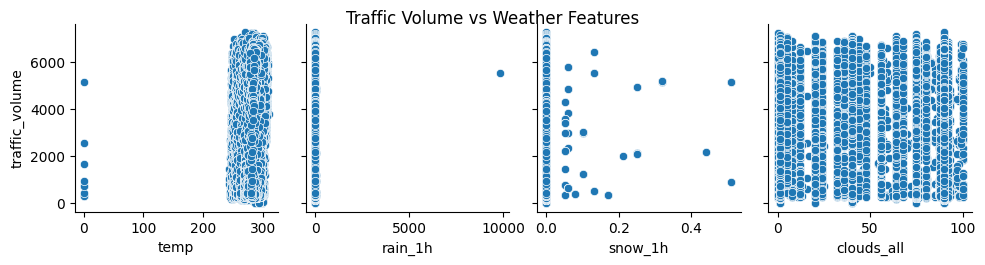

In [23]:
sns.pairplot(df, x_vars=numeric_features, y_vars='traffic_volume', kind='scatter')
plt.suptitle('Traffic Volume vs Weather Features', y=1.02)
plt.show()

## 📈 Analysis of Traffic Volume vs. Weather Features Scatter Plots

The provided pair plot illustrates the relationship between **`traffic_volume`** (on the y-axis of each plot) and four different weather features (on the x-axis of each respective plot): **`temp`**, **`rain_1h`**, **`snow_1h`**, and **`clouds_all`**.

Here is an analysis of the interaction observed in each scatter plot:

---

### 1. Traffic Volume vs. Temperature (`temp`)

* **Plot:** The first plot shows `traffic_volume` against `temp`.
* **Observations:**
    * The vast majority of data points are clustered in a narrow range of temperatures, specifically around **300 units** (likely Kelvin, given the common scale for weather data, which is approximately $273.15K \approx 0^{\circ}C$).
    * At this high temperature cluster, the `traffic_volume` spans almost the **entire range**, from near 0 up to 7000+. This indicates that **temperature alone is not a strong, simple predictor** of traffic volume, as high traffic occurs across a wide range of volumes at this common temperature.
    * There are very few data points at the very low end of `temp` (near 0), which show low to medium traffic volumes.
* **Conclusion:** There is **no clear linear or simple non-linear relationship** between temperature and traffic volume, especially at the most common temperatures. Other factors (like time of day/week, or other weather interactions) are likely more dominant. 
---

### 2. Traffic Volume vs. Rainfall in the Last Hour (`rain_1h`)

* **Plot:** The second plot shows `traffic_volume` against `rain_1h`.
* **Observations:**
    * Almost all data points are concentrated where `rain_1h` is **near zero**.
    * At `rain_1h` $\approx 0$, the `traffic_volume` spans the **full range** (0 to 7000+).
    * There is one notable outlier with a very high `rain_1h` (around 9800) that has a very low `traffic_volume` (near 0).
* **Conclusion:** The data is heavily skewed towards non-raining conditions. Under non-raining conditions, traffic volume is highly variable. The plot does not provide sufficient data across a range of high rainfall values to draw a strong conclusion, though the single high-rain event suggests traffic might drop off significantly, or this point might represent an anomaly. 
---

### 3. Traffic Volume vs. Snowfall in the Last Hour (`snow_1h`)

* **Plot:** The third plot shows `traffic_volume` against `snow_1h`.
* **Observations:**
    * The majority of data points are where `snow_1h` is **near zero**. Similar to rain, traffic volume is highly variable (0 to 7000+) when there is no recorded snowfall.
    * The remaining points (where `snow_1h` is greater than 0) are scattered. They generally show **low to medium traffic volume** (mostly below 3000-4000), with one or two exceptions. There are no high `traffic_volume` readings (i.e., above 6000) when snow is present.
* **Conclusion:** While traffic is highly variable when there is no snow, the presence of recorded snowfall seems to be associated with **lower overall traffic volumes**. This suggests that snowfall may suppress the peak traffic volumes. 
---

### 4. Traffic Volume vs. Cloud Coverage (`clouds_all`)

* **Plot:** The fourth plot shows `traffic_volume` against `clouds_all` (likely percentage from 0 to 100).
* **Observations:**
    * The data points are scattered relatively **uniformly across all levels of cloud coverage** (0 to 100).
    * For almost every level of cloud coverage, the `traffic_volume` spans the **full range** (0 to 7000+).
* **Conclusion:** There is **no apparent relationship** between the percentage of cloud coverage and traffic volume. Traffic volumes are highly variable regardless of whether the sky is clear, partly cloudy, or completely overcast. 
---

### 💡 Summary of Interactions

* **Weak/No Relationship:** `temp` and `clouds_all` show no clear predictive power for `traffic_volume` on their own, as high and low traffic volumes occur across the full range of these variables.
* **Skewed Data:** `rain_1h` data is too concentrated near zero to draw a general conclusion, but the one extreme outlier suggests a potential traffic drop during severe rain.
* **Potential Suppressive Effect:** The presence of **`snow_1h`** seems to **limit the maximum traffic volume**, as there are no high (5000+) traffic events when snow is recorded.

#### 🎉 Bar Plots	Compare traffic patterns on holidays vs. non-holidays

In [24]:
df['is_holiday'].value_counts()

is_holiday
0    48143
1       61
Name: count, dtype: int64

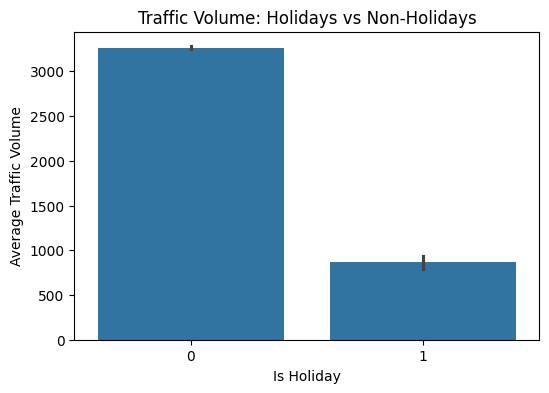

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x='is_holiday', y='traffic_volume', data=df)
plt.title('Traffic Volume: Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Traffic Volume')
plt.show()

The bar plot displays:
* **Y-axis:** Average Traffic Volume.
* **X-axis:** 'Is Holiday' (0 for Non-Holiday, 1 for Holiday).
* **Bars:** Two bars representing the average traffic volume for each category.

### 📊 Bar Plot Analysis: Traffic Volume on Holidays vs. Non-Holidays

The bar plot clearly compares the average traffic volume on days that are non-holidays (represented by '0' on the X-axis) versus days that are holidays (represented by '1' on the X-axis).

#### **Key Observations:**

1.  **Non-Holiday Traffic (Is Holiday = 0):**
    * The bar for non-holidays shows a **significantly higher** average traffic volume.
    * The average traffic volume is approximately **3,250** (based on the height of the bar).

2.  **Holiday Traffic (Is Holiday = 1):**
    * The bar for holidays shows a **much lower** average traffic volume.
    * The average traffic volume is approximately **900** (based on the height of the bar).

3.  **Comparison and Conclusion:**
    * There is a **major difference** in average traffic volume between non-holidays and holidays.
    * The average traffic volume on **non-holidays is over three times greater** than the average traffic volume on holidays ($3250 / 900 \approx 3.6$).
    * This suggests that **traffic volume is significantly lower on holidays**, which aligns with the general expectation that people are less likely to commute for work or school on designated holidays.

#### **Error Bars:**

* The small vertical lines (error bars) on top of each bar indicate the variability or uncertainty (likely a standard deviation or standard error of the mean) around the average traffic volume.
* The error bars are relatively small for both categories compared to the difference between the means, suggesting that the observed difference is **statistically significant** and not due to high variability within the groups.

---

#### ⏰ Hourly/Weekly Trend Plots	Identify peak traffic hours and patterns by day of week

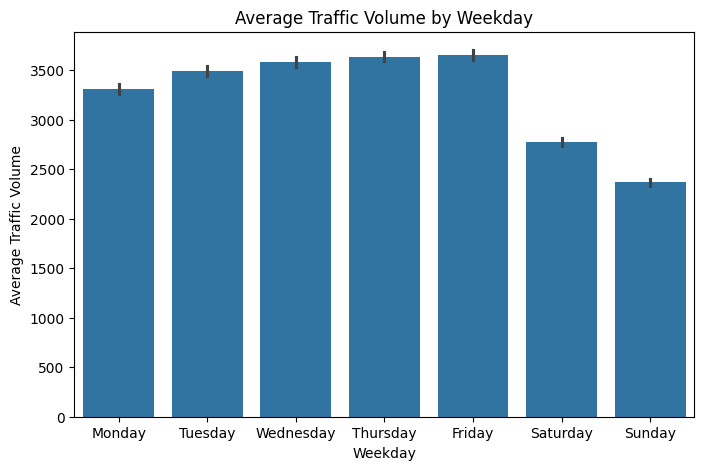

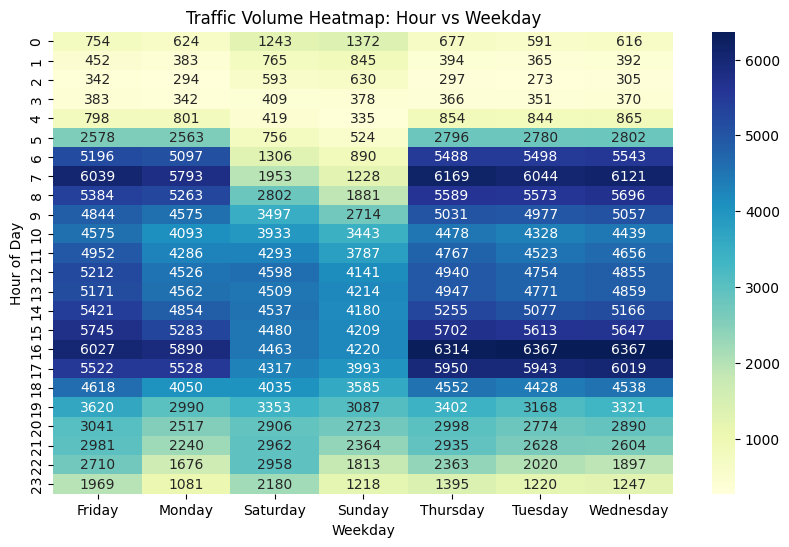

In [26]:
# Mean traffic by weekday
plt.figure(figsize=(8,5))
sns.barplot(x='weekday', y='traffic_volume', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Average Traffic Volume by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Traffic Volume')
plt.show()

# Hour vs Weekday heatmap
traffic_pivot = df.pivot_table(values='traffic_volume', index='hour', columns='weekday', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(traffic_pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Traffic Volume Heatmap: Hour vs Weekday')
plt.xlabel('Weekday')
plt.ylabel('Hour of Day')
plt.show()

# <center> This analysis is based on the bar chart (Average Traffic Volume by Weekday) and the heatmap (Traffic Volume Heatmap: Hour vs Weekday). </center>

## 📊 Average Traffic Volume by Weekday

The **bar chart** clearly illustrates the overall traffic trend throughout the week:

* **Peak Days:** **Thursday** and **Friday** exhibit the highest average traffic volumes, with Friday being slightly higher than Thursday. The traffic volume on these days is consistently above 3,500.
* **High Volume Weekdays:** **Monday**, **Tuesday**, and **Wednesday** also show high and very similar average volumes, all around the 3,500 mark, indicating a heavy, consistent weekday commute pattern.
* **Low Volume Days (Weekends):** **Saturday** and **Sunday** have significantly lower average traffic volumes, with Sunday being the lowest day of the week, dropping below 2,500. This is a typical pattern, suggesting the majority of traffic is work/commute-related.
* **Traffic Drop:** The drop in average traffic from Friday to Saturday, and then Saturday to Sunday, is very steep, confirming the weekend traffic reduction.

## 🌡️ Traffic Volume Heatmap: Hour vs Weekday

The **heatmap** provides a detailed, granular view of the peak traffic hours and patterns across the days of the week. The darker blue/purple colors represent the highest traffic volumes, while the pale yellow represents the lowest. 
### 1. Weekday (Monday - Friday) Patterns

The weekdays show a classic bimodal, or two-peak, traffic pattern, characteristic of commuter traffic:

* **Morning Peak (AM Rush Hour):** The first major peak occurs generally between **7:00 and 9:00 (Hours 7, 8, and 9)**.
    * **Peak Hour:** **8:00 (Hour 8)** is consistently the busiest hour across all weekdays, with Monday and Tuesday showing slightly lower volumes than Wednesday, Thursday, and Friday.
* **Evening Peak (PM Rush Hour):** The second, and often **more intense**, peak occurs in the afternoon/evening, generally between **16:00 and 18:00 (Hours 16, 17, and 18)**.
    * **Peak Hour:** **17:00 (Hour 17)** is the single highest traffic hour for all five weekdays, with values consistently above 5,900 and reaching the highest values in the entire plot (darkest color) on Wednesday, Thursday, and Friday.
* **Mid-day Trough/Shoulder:** Traffic dips significantly after the morning peak (around 10:00 - 15:00) but remains at a moderate-to-high level (around 4,000 to 5,000), suggesting a continuous flow outside of rush hours.
* **Late Night/Early Morning Trough:** The lowest traffic volumes occur between **0:00 and 5:00** on all days, as expected.

### 2. Weekend (Saturday - Sunday) Patterns

The weekend pattern is distinctly different, lacking the sharp rush-hour peaks:

* **Saturday:** Traffic starts to ramp up later than weekdays (around 8:00-9:00) and reaches its peak later in the day, with the highest volume hours occurring broadly from **10:00 to 18:00**. Unlike weekdays, the traffic remains high and sustained during these hours, suggesting activity like shopping, errands, and leisure trips. The maximum volume is significantly lower than the weekday PM peak.
* **Sunday:** This day shows the lowest overall traffic. The volume rises gradually from 8:00 and peaks in the mid-afternoon, around **12:00 to 18:00**, before declining. The highest volumes on Sunday are comparable to the mid-day trough on a typical weekday, reflecting a much lighter travel pattern.

### 3. Key Peak Traffic Hours Summary

| Period | Day(s) of the Week | General Peak Hours (Hour of Day) | Highest Volume Hour(s) |
| :--- | :--- | :--- | :--- |
| **Overall** | **Friday** | **17:00** | **17:00 (Evening Rush Hour)** |
| **AM Peak** | Weekdays | 7:00 - 9:00 | 8:00 |
| **PM Peak** | Weekdays | 16:00 - 18:00 | 17:00 |
| **Weekend** | Saturday | 10:00 - 18:00 (Sustained) | 16:00 - 17:00 (Sub-peak) |

***

### <center>🤖 Modeling & Evaluation</center>

#### 🧩 Overview
> In this step, we will build and evaluate **regression models** to predict **hourly traffic volume** using the features identified in the dataset.  
> We will also assess the performance of each model using standard **evaluation metrics**.

---

#### 📊 Models Considered

- 📝 **Linear Regression** – Simple baseline model to understand linear relationships  
- 🌳 **Decision Tree Regressor** – Captures **non-linear patterns** in the data  
- 🌲 **Random Forest Regressor** – Ensemble method that reduces overfitting and improves accuracy  
- ⚡ **Gradient Boosting (XGBoost / LightGBM)** – Powerful boosting techniques for **high predictive performance**

---

#### 📏 Evaluation Metrics

| Metric | Purpose |
|--------|---------|
| 🧮 **MAE (Mean Absolute Error)** | Measures the **average absolute error** between predicted and actual traffic volume |
| 📉 **MSE (Mean Squared Error)** | Penalizes **large errors** more heavily than MAE |
| 🔄 **RMSE (Root Mean Squared Error)** | **Interpretable version of MSE** in the same units as the target |
| 📊 **R² Score** | Indicates the **proportion of variance explained** by the model |

---

#### 🌟 Goal
> Compare the performance of different regression models using these metrics to select the **best predictive model** for hourly traffic volume.


### <center>⚙️ Hyperparameter Tuning</center>

#### 🧩 Overview
> Hyperparameter tuning is a key step to **optimize the performance** of machine learning models.  
> By selecting the best combination of hyperparameters, we can **improve accuracy, reduce overfitting, and boost generalization**.

---

#### 🔑 Common Tuning Strategies

- 🏷️ **Grid Search** – Exhaustively tests all combinations of specified hyperparameters  
- 🎲 **Random Search** – Randomly samples hyperparameter combinations for faster exploration  
- 🌟 **Bayesian Optimization / Advanced Methods** – Uses probabilistic models to efficiently find optimal hyperparameters  

---

#### 🛠️ Example Hyperparameters to Tune

| Model | Hyperparameters |
|-------|----------------|
| 📝 **Linear Regression** | Mostly **no hyperparameters**, but can tune **regularization parameters** if using Ridge/Lasso |
| 🌳 **Decision Tree Regressor** | `max_depth`, `min_samples_split`, `min_samples_leaf` |
| 🌲 **Random Forest Regressor** | `n_estimators`, `max_depth`, `max_features` |
| ⚡ **Gradient Boosting (XGBoost / LightGBM)** | `learning_rate`, `n_estimators`, `max_depth`, `subsample`, `colsample_bytree` |


---

#### 📏 Evaluation During Tuning
- Use **cross-validation** to estimate model performance on unseen data  
- Track metrics like **MAE, MSE, RMSE, R² Score** for each hyperparameter combination  
- Select hyperparameters that **optimize predictive performance** while avoiding overfitting  

---

#### 🌟 Goal
> Find the **best combination of hyperparameters** for each model to **maximize predictive accuracy** on hourly traffic volume while ensuring robust generalization.


## Data Preparation & Splitting Before Training and Tuning

Before applying and tuning machine learning models, it is crucial to properly prepare and split the data. Here’s a structured approach tailored for **Linear Regression**, **Decision Tree Regressor**, **Random Forest Regressor**, and **Gradient Boosting (XGBoost / LightGBM)**:

### 1. Analyze the Target Distribution
- The traffic volume is **heavily right-skewed** with a **long tail** and **multiple peaks** (multi-modal).  
- **Linear Regression**: We could apply a **log** or **Box-Cox transformation** to the target to reduce skewness.
- **Tree-based models**: Transformations are optional as they handle skewed distributions naturally.  
- ⚠️ After prediction with Linear Regression, **inverse-transform** the values to interpret them in the original scale.

### 2. Split the Data
- For **hyperparameter tuning**, create **three separate sets**:
  1. **Training set** – for fitting the model.  
  2. **Validation set** – for tuning hyperparameters and early stopping.  
  3. **Test set** – for final evaluation (kept unseen until the end).  
- Typical split ratios:  
  - Train: 60–70%  
  - Validation: 15–20%  
  - Test: 15–20%  

- If the target is **multi-modal or highly skewed**, consider **stratified splitting** using binned target values to ensure representative distributions across all sets.

### 3. Feature Scaling & Transformation
- **Linear Regression**: Standardize or normalize features.  
- **Tree-based models**: Usually **no scaling needed**.  
- Apply any target transformation **after splitting** to prevent data leakage.

### 4. Hyperparameter Tuning Strategy
- Use the **validation set** to tune model hyperparameters.  
- **Cross-validation** can be applied on the training set to get robust performance estimates.  
- Tree-based models support **early stopping** using the validation set (especially XGBoost and LightGBM).  

### 5. Summary Workflow
1. Analyze and optionally transform the target (log/Box-Cox for Linear Regression).  
2. Split data into **train / validation / test** (stratify if needed).  
3. Scale or normalize features if required (Linear Regression).  
4. Train models using training set.  
5. Tune hyperparameters using validation set.  
6. Evaluate final model performance on test set (inverse-transform predictions for Linear Regression).  


## ⚙️ Setting Up the Validation Framework

In [27]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_final,test_size=0.2,random_state=42)
df_train, df_val = train_test_split(df_full_train,test_size=0.25, random_state=42)

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
y_train = df_train['traffic_volume']
y_val = df_val['traffic_volume']
y_test = df_test['traffic_volume']

In [30]:
# Delete the target variable for the datasets I will use for training,validate and test to avoid future problems
del  df_train['traffic_volume']
del  df_val['traffic_volume']
del  df_test['traffic_volume']

In [31]:
# Train
X_train = df_train

# Validation
X_val = df_val

# Test
X_test = df_test

## <center>📝 Linear Regression</center>

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
# Predictions
y_val_pred_lr = lr_model.predict(X_val)
y_test_pred_lr = lr_model.predict(X_test)

In [34]:
# Metrics
mae_val_lr = mean_absolute_error(y_val, y_val_pred_lr)
mse_val_lr = mean_squared_error(y_val, y_val_pred_lr)
rmse_val_lr = np.sqrt(mse_val_lr)
r2_val_lr = r2_score(y_val, y_val_pred_lr)

mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

In [35]:
print("=== Linear Regression ===")
print("Validation Metrics: MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R2: {:.3f}".format(mae_val_lr, mse_val_lr, rmse_val_lr, r2_val_lr))
print("Test Metrics:       MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R2: {:.3f}".format(mae_test_lr, mse_test_lr, rmse_test_lr, r2_test_lr))

=== Linear Regression ===
Validation Metrics: MAE: 1569.59, MSE: 3157989.80, RMSE: 1777.07, R2: 0.195
Test Metrics:       MAE: 1577.90, MSE: 3204036.77, RMSE: 1789.98, R2: 0.190


### 📝 Linear Regression ⚙️ Hyperparameter Tuning

In [36]:
from itertools import product

def tune_and_evaluate(model_class, param_grid, X_train, y_train, X_val, y_val, X_test, y_test):
    best_model = None
    best_params = None
    best_mse = float('inf')
    
    keys = param_grid.keys()
    for values in product(*param_grid.values()):
        params = dict(zip(keys, values))
        
        # Only add random_state if the model supports it
        try:
            model_params = model_class().get_params()
            if 'random_state' in model_params:
                params['random_state'] = 42
        except TypeError:
            # Some models may need mandatory args, skip in that case
            pass
        
        model = model_class(**params)
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        mse_val = mean_squared_error(y_val, y_val_pred)
        
        if mse_val < best_mse:
            best_mse = mse_val
            best_model = model
            best_params = params
    
    # Validation metrics
    y_val_pred = best_model.predict(X_val)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val, y_val_pred)
    
    # Test metrics
    y_test_pred = best_model.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    return best_model, best_params, {
        "Validation": {"MAE": mae_val, "MSE": mse_val, "RMSE": rmse_val, "R2": r2_val},
        "Test": {"MAE": mae_test, "MSE": mse_test, "RMSE": rmse_test, "R2": r2_test}
    }

In [37]:
from sklearn.linear_model import Ridge

ridge_param_grid = {"alpha": [0.01, 0.1, 1, 10, 100], "fit_intercept": [True, False]}
best_ridge, ridge_params, ridge_metrics = tune_and_evaluate(Ridge, ridge_param_grid, X_train, y_train, X_val, y_val, X_test, y_test)

print("=== Linear Regression (Ridge) ===")
print("Best Params:", ridge_params)
print("Validation Metrics:", ridge_metrics["Validation"])
print("Test Metrics:", ridge_metrics["Test"])

=== Linear Regression (Ridge) ===
Best Params: {'alpha': 0.01, 'fit_intercept': True, 'random_state': 42}
Validation Metrics: {'MAE': 1569.5904395816272, 'MSE': 3157989.808324177, 'RMSE': np.float64(1777.0733829316607), 'R2': 0.19491772960809983}
Test Metrics: {'MAE': 1577.9012905210366, 'MSE': 3204037.0461129514, 'RMSE': np.float64(1789.9824150289721), 'R2': 0.1895722631953396}


## <center>🌳 Decision Tree Regressor</center>

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [40]:
y_val_pred_dt = dt_model.predict(X_val)
y_test_pred_dt = dt_model.predict(X_test)

In [41]:
mae_val_dt = mean_absolute_error(y_val, y_val_pred_dt)
mse_val_dt = mean_squared_error(y_val, y_val_pred_dt)
rmse_val_dt = np.sqrt(mse_val_dt)
r2_val_dt = r2_score(y_val, y_val_pred_dt)

In [42]:
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)
mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
rmse_test_dt = np.sqrt(mse_test_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

In [43]:
print("\n=== Decision Tree Regressor ===")
print("Validation Metrics: MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R2: {:.3f}".format(mae_val_dt, mse_val_dt, rmse_val_dt, r2_val_dt))
print("Test Metrics:       MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R2: {:.3f}".format(mae_test_dt, mse_test_dt, rmse_test_dt, r2_test_dt))



=== Decision Tree Regressor ===
Validation Metrics: MAE: 315.41, MSE: 364800.87, RMSE: 603.99, R2: 0.907
Test Metrics:       MAE: 315.91, MSE: 383201.34, RMSE: 619.03, R2: 0.903


### 🌳 Decision Tree Regressor ⚙️ Hyperparameter Tuning

In [44]:
dt_param_grid = {
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}
best_dt, dt_params, dt_metrics = tune_and_evaluate(DecisionTreeRegressor, dt_param_grid, X_train, y_train, X_val, y_val, X_test, y_test)

print("\n=== Decision Tree Regressor ===")
print("Best Params:", dt_params)
print("Validation Metrics:", dt_metrics["Validation"])
print("Test Metrics:", dt_metrics["Test"])


=== Decision Tree Regressor ===
Best Params: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5, 'random_state': 42}
Validation Metrics: {'MAE': 294.6224891544881, 'MSE': 251157.56902727572, 'RMSE': np.float64(501.1562321544807), 'R2': 0.9359711341165187}
Test Metrics: {'MAE': 295.0658559012237, 'MSE': 256523.257851175, 'RMSE': np.float64(506.48125123362166), 'R2': 0.9351151187373764}


## <center>🌲 Random Forest Regressor</center>

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)

In [48]:
mae_val_rf = mean_absolute_error(y_val, y_val_pred_rf)
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf)

In [49]:
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

In [50]:
print("\n=== Random Forest Regressor ===")
print("Validation Metrics: MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R2: {:.3f}".format(mae_val_rf, mse_val_rf, rmse_val_rf, r2_val_rf))
print("Test Metrics:       MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R2: {:.3f}".format(mae_test_rf, mse_test_rf, rmse_test_rf, r2_test_rf))



=== Random Forest Regressor ===
Validation Metrics: MAE: 270.17, MSE: 226921.62, RMSE: 476.36, R2: 0.942
Test Metrics:       MAE: 271.07, MSE: 234898.95, RMSE: 484.66, R2: 0.941


### 🌲 Random Forest Regressor ⚙️ Hyperparameter Tuning

In [51]:
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": [None, "sqrt"]
}
best_rf, rf_params, rf_metrics = tune_and_evaluate(RandomForestRegressor, rf_param_grid, X_train, y_train, X_val, y_val, X_test, y_test)

print("\n=== Random Forest Regressor ===")
print("Best Params:", rf_params)
print("Validation Metrics:", rf_metrics["Validation"])
print("Test Metrics:", rf_metrics["Test"])


=== Random Forest Regressor ===
Best Params: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}
Validation Metrics: {'MAE': 276.32769170823394, 'MSE': 213840.64756413453, 'RMSE': np.float64(462.4290730091854), 'R2': 0.9454845251275951}
Test Metrics: {'MAE': 277.34144460872966, 'MSE': 220428.5678839479, 'RMSE': np.float64(469.49820860568565), 'R2': 0.9442448939178143}


## <center>⚡ Gradient Boosting (XGBoost / LightGBM)</center>

In [52]:
from xgboost import XGBRegressor

In [53]:
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [54]:
y_val_pred_xgb = xgb_model.predict(X_val)
y_test_pred_xgb = xgb_model.predict(X_test)

In [55]:
mae_val_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
mse_val_xgb = mean_squared_error(y_val, y_val_pred_xgb)
rmse_val_xgb = np.sqrt(mse_val_xgb)
r2_val_xgb = r2_score(y_val, y_val_pred_xgb)

In [56]:
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

In [57]:
print("\n=== XGBoost Regressor ===")
print("Validation Metrics: MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R2: {:.3f}".format(mae_val_xgb, mse_val_xgb, rmse_val_xgb, r2_val_xgb))
print("Test Metrics:       MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R2: {:.3f}".format(mae_test_xgb, mse_test_xgb, rmse_test_xgb, r2_test_xgb))


=== XGBoost Regressor ===
Validation Metrics: MAE: 269.69, MSE: 210321.12, RMSE: 458.61, R2: 0.946
Test Metrics:       MAE: 270.04, MSE: 216370.38, RMSE: 465.16, R2: 0.945


### ⚡ XGBoost ⚙️ Hyperparameter Tuning

In [58]:
xgb_param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [4, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}
best_xgb, xgb_params, xgb_metrics = tune_and_evaluate(XGBRegressor, xgb_param_grid, X_train, y_train, X_val, y_val, X_test, y_test)

print("\n=== XGBoost Regressor ===")
print("Best Params:", xgb_params)
print("Validation Metrics:", xgb_metrics["Validation"])
print("Test Metrics:", xgb_metrics["Test"])


=== XGBoost Regressor ===
Best Params: {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 1.0, 'random_state': 42}
Validation Metrics: {'MAE': 269.45135498046875, 'MSE': 204789.09375, 'RMSE': np.float64(452.53628998125663), 'R2': 0.9477920532226562}
Test Metrics: {'MAE': 270.09771728515625, 'MSE': 212163.28125, 'RMSE': np.float64(460.6118553076983), 'R2': 0.94633549451828}


**Even when using the same random_state, certain hyperparameters (such as subsampling parameters) introduce randomness during training, which can lead to slightly different evaluation metrics across runs.:**

subsample < 1.0 → random subset of rows for each tree

colsample_bytree < 1.0 → random subset of columns for each tree

colsample_bylevel < 1.0 → random subset of columns for each level

✅ Fix: Set all subsampling parameters to 1.0 if we want deterministic results.

#### <u>I will be using the model without setting the subsampling parameters to 1</u>

---
### Model Performance Comparison

| Model             | MAE     | MSE          | RMSE    | R² Score |
| ----------------- | ------- | ------------ | ------- | -------- |
| Linear Regression | 1577.90 | 3,204,037.05 | 1789.98 | 0.190    |
| Decision Tree     | 295.07  | 256,523.26   | 506.48  | 0.935    |
| Random Forest     | 277.34  | 220,428.57   | 469.50  | 0.944    |
| **XGBoost**       | 270.10  | 212,163.28   | 460.61  | 0.946    |

---

✅ Conclusion:

<b>Best model: <u>XGBoost Regressor</u></b>

# 💾 Saving the Best Model

In [59]:
import joblib

# Save the best model (XGBoost)
filename = "best_model_xgb.pkl"
joblib.dump(best_xgb, filename)

print(f"Best model saved as {filename}")

Best model saved as best_model_xgb.pkl
